## Random Number

This section is a preamble to the notebook on Elastic Scattering.  It demonstrates how to use random number generator and how to set them up in a way to get reproducible answers.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Monte Carlo methods rely on random numbers to sample from distributions, however true random numbers are not entirely desirable since they make it impossible to debug code.  It should also be noted that a number is not random, but the sequence of numbers is random.

In [2]:
np.random.rand()

0.798093647460909

In [3]:
np.random.rand(10)

array([0.50957261, 0.42296593, 0.21805169, 0.4482612 , 0.49121409,
       0.21138581, 0.34514751, 0.3365391 , 0.06544828, 0.53895855])

We instead use pseudo-random number generators that create a sequence of numbers that can appear to be random.  This allows for a reproducible sequence when we set the seed (i.e. starting point).

In [4]:
np.random.seed(2)
print(np.random.rand(10))

[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
 0.20464863 0.61927097 0.29965467 0.26682728]


# Elastic Scattering

This notebook demonstrates the energy distribution of neutrons starting at a given energy as they collided through elastic scattering that is isotropic in the COM.  The notebook will show the evolution after a few collisions in both energy and lethargy space.  It will also illustrate the advantage of using lethargy since it provides a way of measuring the change following a collision that does not depend on the initial energy/lethargy of the neutron.  Note that this notebook neglects the effects of thermal scattering.

Things to change:
- Change the value of A from 1 (H-1), 2 (H-2), 12 (C), 238 (U-238)
- Change the number of collisions

Things to observe:
- Forward scattering only for H-1 in LAB
- Increase in A makes scattering more and more isotropic in LAB
- H-1 allows a full lost of energy on 1st collision, and neutrons bunch up near zero with further collisions
- In lethargy (also for energy with high A), the distribution becomes Gaussian due to the Central Limit Theorem
- Lethargy gain between collision is the same, while energy change decreases after each collision

This block sets the target nuclide mass (A) and the initial neutron energy (E_start).

In [5]:
A = 10
E_start = 1e6

This block loops over many neutrons (nps) and tracks the outgoing neutron energy distribution after a few collisions (n_collisions).  All outgoing energies and outgoing angles are stored in this example, this is done for illustration purposes only!  In practice you never want to store the history of all events.

In [6]:
random.seed(a=2)
nps = 100000
n_collisions = 5
E1 = np.zeros([nps,n_collisions])
mu1 = np.zeros([nps,n_collisions])
for i in range(nps):
    E0 = E_start
    for j in range(n_collisions):  
        eta = 2*random.random()-1  #random sample between -1 and 1 in COM
        E = E0*(A**2+1+2*A*eta)/((A+1)**2)  #random sample between alpha*E and E
        mu = (1 + A*eta) / (np.sqrt(A**2+2*A*eta+1)) #convert cosine of the angle from COM to LAB
        E0 = E
        E1[i,j] = E #This stores all energies for each starting particle after each collision
        mu1[i,j] = mu #This stores all LAB cosines for each starting particle after each collision

This block plots the histogram of the energy after the first collision.  It matches the theoritical distribution as a uniform distribution between $\alpha$ E and E.  Despite sampling, 100000 neutrons, we can still see some fluctuations in the distribution.

(array([3315., 3334., 3355., 3351., 3354., 3263., 3288., 3376., 3257.,
        3347., 3249., 3286., 3261., 3287., 3435., 3278., 3346., 3299.,
        3266., 3398., 3375., 3347., 3370., 3401., 3423., 3446., 3357.,
        3335., 3341., 3260.]),
 array([669425.13133579, 680444.2657499 , 691463.40016402, 702482.53457813,
        713501.66899225, 724520.80340637, 735539.93782048, 746559.0722346 ,
        757578.20664871, 768597.34106283, 779616.47547694, 790635.60989106,
        801654.74430518, 812673.87871929, 823693.01313341, 834712.14754752,
        845731.28196164, 856750.41637576, 867769.55078987, 878788.68520399,
        889807.8196181 , 900826.95403222, 911846.08844634, 922865.22286045,
        933884.35727457, 944903.49168868, 955922.6261028 , 966941.76051692,
        977960.89493103, 988980.02934515, 999999.16375926]),
 <BarContainer object of 30 artists>)

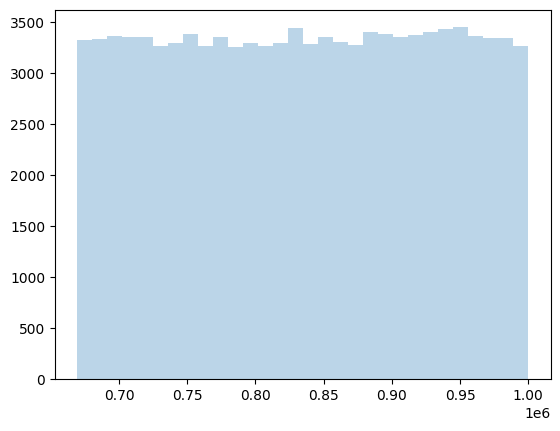

In [7]:
plt.hist(E1[:,0], bins = 30,alpha=0.3)

We can also plot the distribution of other collisions. The starting point for each particle is a fixed energy point, but after the first collision the outgoing distribution is uniform which becomes the starting point for the following collisions.  Thus, after 2 collisions, we have the convolution of two uniform distributions which gives the bilinear distribution.  As we keep colliding, the distribution becomes Gaussian.

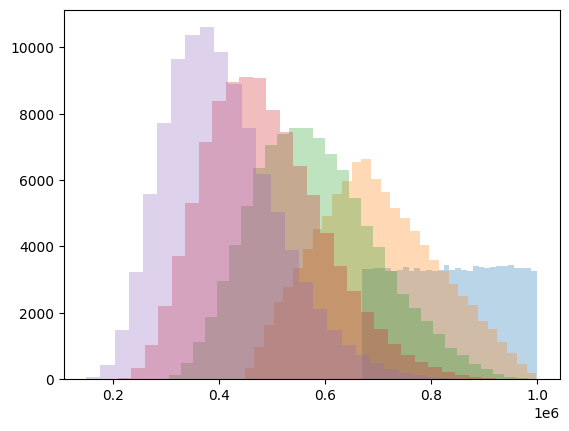

In [8]:
for i in range(n_collisions):
    plt.hist(E1[:,i], bins = 30,alpha=0.3)

We can also calculate the average energy of neutrons after each collision, and we can see a decrease in $\Delta$E.

In [9]:
for i in range(n_collisions):
    print(np.mean(E1[:,i]))

835158.0466817062
696976.9279190848
581342.8721195552
485193.33952756145
405121.7141015048


The average energy change after each collision becomes smaller as our neutrons slow down.

In [10]:
for i in range(n_collisions-1):
    print("Delta E", np.mean(E1[:,i])-np.mean(E1[:,i+1]))

Delta E 138181.11876262142
Delta E 115634.05579952954
Delta E 96149.5325919938
Delta E 80071.62542605662


This block illustrates that no neutron can scatter below an energy $\alpha^n E_0$, where $n$ is the number of collisions.  You can also notice that the maxixum value is still very near $E_0$.

In [11]:
alpha = ((A-1)/(A+1))**2
print('1 collision ', "%.4f" % np.max(E1[:,0]), "%.4f" % np.min(E1[:,0]), "%.4f" % float(alpha*E_start))
print('2 collisions', "%.4f" % np.max(E1[:,1]), "%.4f" % np.min(E1[:,1]), "%.4f" % float(alpha**2*E_start))
print('3 collisions', "%.4f" % np.max(E1[:,2]), "%.4f" % np.min(E1[:,2]), "%.4f" % float(alpha**3*E_start))
print('4 collisions', "%.4f" % np.max(E1[:,3]), "%.4f" % np.min(E1[:,3]), "%.4f" % float(alpha**4*E_start))

1 collision  999999.1638 669425.1313 669421.4876
2 collisions 998479.4744 448375.0088 448125.1281
3 collisions 983754.0573 306125.6754 299984.5899
4 collisions 972543.1633 209115.6659 200816.1304


This block demonstrates that the elastic scattering cosine of an isotropic in the COM collisison is not isotropic in the LAB, but it is energy independent.  As A becomes larger, the scattering cosine in the LAB becomes nearly isotropic.  When the mass of the target is identical to that of the neutron (e.g. H-1), the scattering angle in the LAB is forward only.

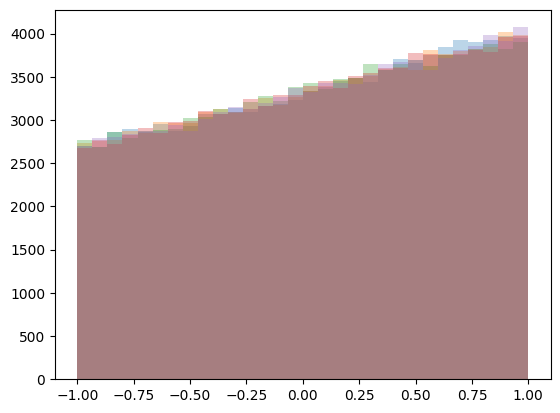

In [12]:
for i in range(n_collisions):
    plt.hist(mu1[:,i], bins = 30,alpha=0.3)

## Lethargy

We can repeat the same exercise in lethargy instead of energy.  We will use E_start as the reference energy, thus the initial lethargy will be 0.  The code below is identical to the one above, except that we transform the outgoing energy to lethargy.  We could instead transform the PDF to lethargy and sample from that, but it is easier to sample from the uniform energy distribution.

In [13]:
random.seed(a=2)
nps = 100000
n_collisions = 5
L1 = np.zeros([nps,n_collisions])
for i in range(nps):
    E0 = E_start
    for j in range(n_collisions):  
        eta = 2*random.random()-1
        E = E0*(A**2+1+2*A*eta)/((A+1)**2)
        mu = (1 + A*eta) / (np.sqrt(A**2+2*A*eta+1))
        E0 = E
        L1[i,j] = np.log(E_start/E)  #same process as before, except now we convert every outgoing energy to lethargy

(array([3960., 3979., 3931., 3915., 3937., 3838., 3736., 3666., 3702.,
        3582., 3429., 3487., 3439., 3372., 3334., 3223., 3183., 3156.,
        3083., 3142., 3054., 3074., 2926., 2868., 2950., 2865., 2889.,
        2860., 2706., 2714.]),
 array([8.36241087e-07, 1.33786733e-02, 2.67565103e-02, 4.01343474e-02,
        5.35121845e-02, 6.68900215e-02, 8.02678586e-02, 9.36456956e-02,
        1.07023533e-01, 1.20401370e-01, 1.33779207e-01, 1.47157044e-01,
        1.60534881e-01, 1.73912718e-01, 1.87290555e-01, 2.00668392e-01,
        2.14046229e-01, 2.27424066e-01, 2.40801903e-01, 2.54179740e-01,
        2.67557577e-01, 2.80935414e-01, 2.94313251e-01, 3.07691088e-01,
        3.21068926e-01, 3.34446763e-01, 3.47824600e-01, 3.61202437e-01,
        3.74580274e-01, 3.87958111e-01, 4.01335948e-01]),
 <BarContainer object of 30 artists>)

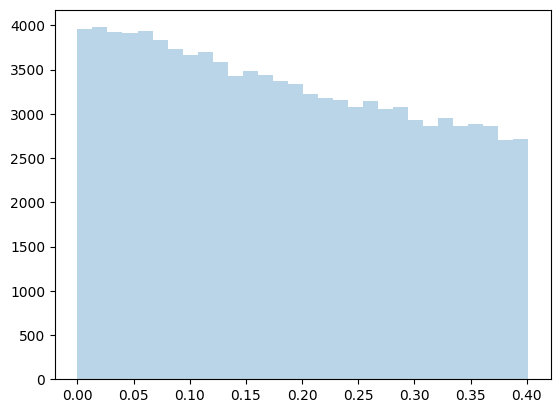

In [14]:
plt.hist(L1[:,0], bins = 30,alpha=0.3)

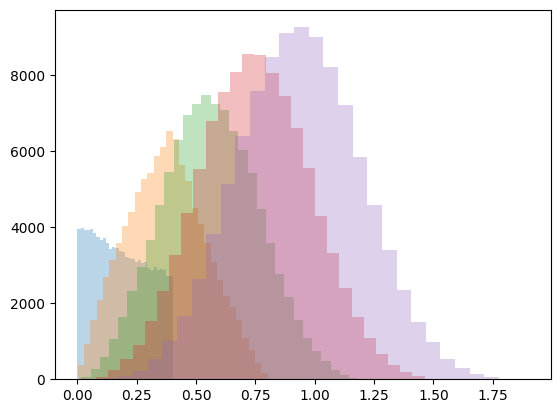

In [15]:
for i in range(n_collisions):
    plt.hist(L1[:,i], bins = 30,alpha=0.3)

If we compute the mean of the lethargy distribution, we see that each collision increases the distribution by approximately $\xi$.

In [16]:
for i in range(n_collisions):
    print(np.mean(L1[:,i]))

0.1867539003823045
0.3741694352257738
0.5620570488072191
0.7493580532210615
0.9364077148092926


The lethargy increases by a constant amount at each collision thus making removing the dependency on the energy of the incoming particle.

In [17]:
for i in range(n_collisions-1):
    print("Delta u", np.mean(L1[:,i+1])-np.mean(L1[:,i]))

Delta u 0.1874155348434693
Delta u 0.1878876135814453
Delta u 0.18730100441384245
Delta u 0.1870496615882311
